Ideia 01: Analisar a quantidade total de casos no interior e na região metropolitana e fazer a comparação, com isso, comprovar a elavada atenção recebida pela metropole em relação as cidade do interior, uma vez que a quantidade de pessoas que habita tais regiões são próximas.

Ideia 02: Analisar a relação entre a população e o número de caso das 5 cidades da rgm e do interior com mais casos de covid registrados no dataframe, tendo isso, realizar a construção de gráfico comparativo entre as porcentagens encontradas e finalizar a hipotese.


# Dados iniciais do Dataframe escolhido

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dados-covid-19-municipios.csv", encoding = "ISO-8859-1", delimiter=';')
df

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,3500105.0,Interior,Adamantina,10625.0,184.0,NaN,NaN,NaN
1,3500204.0,Interior,Adolfo,972.0,28.0,NaN,NaN,NaN
2,3500303.0,Interior,Aguaí,6870.0,136.0,NaN,NaN,NaN
3,3500402.0,Interior,Águas da Prata,1910.0,38.0,NaN,NaN,NaN
4,3500501.0,Interior,Águas de Lindóia,5199.0,63.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
642,3557154.0,Interior,Zacarias,280.0,12.0,NaN,NaN,NaN
643,3557204.0,Interior,Chavantes,2697.0,61.0,NaN,NaN,NaN
644,3557303.0,Interior,Estiva Gerbi,1195.0,36.0,NaN,NaN,NaN
645,NaN,NaN,Ignorado,218.0,0.0,NaN,NaN,NaN


In [3]:
df.head()

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,3500105.0,Interior,Adamantina,10625.0,184.0,NaN,NaN,NaN
1,3500204.0,Interior,Adolfo,972.0,28.0,NaN,NaN,NaN
2,3500303.0,Interior,Aguaí,6870.0,136.0,NaN,NaN,NaN
3,3500402.0,Interior,Águas da Prata,1910.0,38.0,NaN,NaN,NaN
4,3500501.0,Interior,Águas de Lindóia,5199.0,63.0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_IBGE             645 non-null    float64
 1   Grande região        645 non-null    object 
 2   Município            646 non-null    object 
 3   Mun_Total de casos   646 non-null    float64
 4   Mun_Total de óbitos  646 non-null    float64
 5   Unnamed: 5           0 non-null      float64
 6   Unnamed: 6           0 non-null      float64
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(6), object(2)
memory usage: 40.6+ KB


In [5]:
df.nunique()

Cod_IBGE               645
Grande região            3
Município              646
Mun_Total de casos     618
Mun_Total de óbitos    271
Unnamed: 5               0
Unnamed: 6               0
Unnamed: 7               0
dtype: int64

In [6]:
df.describe()

,Cod_IBGE,Mun_Total de casos,Mun_Total de óbitos,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,6.450000e+02,6.460000e+02,646.000000,0.0,0.0,0.0
mean,3.528698e+06,9.541206e+03,272.252322,NaN,NaN,NaN
std,1.670033e+04,4.723784e+04,1801.689347,NaN,NaN,NaN
min,3.500105e+06,1.190000e+02,0.000000,NaN,NaN,NaN
25%,3.514601e+06,8.565000e+02,19.000000,NaN,NaN,NaN
50%,3.528700e+06,2.267500e+03,47.000000,NaN,NaN,NaN
75%,3.543204e+06,6.935750e+03,138.750000,NaN,NaN,NaN
max,3.557303e+06,1.127975e+06,44040.000000,NaN,NaN,NaN


# Tratando os dados dispostos no dataframe

In [7]:
df.drop(["Unnamed: 5", "Unnamed: 6", "Unnamed: 7"], axis=1, inplace=True)

In [8]:
df

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3500105.0,Interior,Adamantina,10625.0,184.0
1,3500204.0,Interior,Adolfo,972.0,28.0
2,3500303.0,Interior,Aguaí,6870.0,136.0
3,3500402.0,Interior,Águas da Prata,1910.0,38.0
4,3500501.0,Interior,Águas de Lindóia,5199.0,63.0
...,...,...,...,...,...
642,3557154.0,Interior,Zacarias,280.0,12.0
643,3557204.0,Interior,Chavantes,2697.0,61.0
644,3557303.0,Interior,Estiva Gerbi,1195.0,36.0
645,NaN,NaN,Ignorado,218.0,0.0


In [9]:
dfn = df.dropna(axis = 0, how ='any') 
dfn

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3500105.0,Interior,Adamantina,10625.0,184.0
1,3500204.0,Interior,Adolfo,972.0,28.0
2,3500303.0,Interior,Aguaí,6870.0,136.0
3,3500402.0,Interior,Águas da Prata,1910.0,38.0
4,3500501.0,Interior,Águas de Lindóia,5199.0,63.0
...,...,...,...,...,...
640,3557006.0,Interior,Votorantim,12545.0,572.0
641,3557105.0,Interior,Votuporanga,22769.0,508.0
642,3557154.0,Interior,Zacarias,280.0,12.0
643,3557204.0,Interior,Chavantes,2697.0,61.0


In [10]:
dfn['Mun_Total de casos'] = dfn['Mun_Total de casos'].astype('int64')
dfn['Mun_Total de óbitos'] = dfn['Mun_Total de óbitos'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
dfn

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3500105.0,Interior,Adamantina,10625,184
1,3500204.0,Interior,Adolfo,972,28
2,3500303.0,Interior,Aguaí,6870,136
3,3500402.0,Interior,Águas da Prata,1910,38
4,3500501.0,Interior,Águas de Lindóia,5199,63
...,...,...,...,...,...
640,3557006.0,Interior,Votorantim,12545,572
641,3557105.0,Interior,Votuporanga,22769,508
642,3557154.0,Interior,Zacarias,280,12
643,3557204.0,Interior,Chavantes,2697,61


# Organizando as informações desejadas

In [12]:
casosInterior = 0
casosRGM = 0

for i in range(0,len(dfn['Mun_Total de casos'])):
  if(dfn['Grande região'][i] == 'Interior'):
    casosInterior = casosInterior + dfn['Mun_Total de casos'][i]
  else:
    casosRGM = casosRGM + dfn['Mun_Total de casos'][i]

In [13]:
total = casosInterior+casosRGM

print('Quantidade total de casos no Interior:', casosInterior)
print('Quantidade total de casos na Região Metropolitana:', casosRGM)
print('Quantidade total de casos em São Paulo:', total)

Quantidade total de casos no Interior: 4184048
Quantidade total de casos na Região Metropolitana: 1979353
Quantidade total de casos em São Paulo: 6163401


In [14]:
df_cidadesInterior  = (dfn[dfn['Grande região'] == 'Interior'])
_cidadesInterior  = (dfn[dfn['Grande região'] == 'Interior'])['Município']
cidadesInterior = _cidadesInterior.to_numpy()
df_cidadesInterior 

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3500105.0,Interior,Adamantina,10625,184
1,3500204.0,Interior,Adolfo,972,28
2,3500303.0,Interior,Aguaí,6870,136
3,3500402.0,Interior,Águas da Prata,1910,38
4,3500501.0,Interior,Águas de Lindóia,5199,63
...,...,...,...,...,...
640,3557006.0,Interior,Votorantim,12545,572
641,3557105.0,Interior,Votuporanga,22769,508
642,3557154.0,Interior,Zacarias,280,12
643,3557204.0,Interior,Chavantes,2697,61


In [15]:
df_cidadesRGM  = (dfn[dfn['Grande região'] != 'Interior'])
_cidadesRGM  = (dfn[dfn['Grande região'] != 'Interior'])['Município']
cidadesRGM = _cidadesRGM.to_numpy()
df_cidadesRGM

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
44,3503901.0,RMSP (exceto capital),Arujá,12381,361
64,3505708.0,RMSP (exceto capital),Barueri,46723,1259
74,3506607.0,RMSP (exceto capital),Biritiba Mirim,1588,120
101,3509007.0,RMSP (exceto capital),Caieiras,12962,357
103,3509205.0,RMSP (exceto capital),Cajamar,5655,267
121,3510609.0,RMSP (exceto capital),Carapicuíba,39057,1276
144,3513009.0,RMSP (exceto capital),Cotia,26740,797
152,3513801.0,RMSP (exceto capital),Diadema,31182,1544
167,3515004.0,RMSP (exceto capital),Embu das Artes,11161,731
168,3515103.0,RMSP (exceto capital),Embu-Guaçu,5901,236


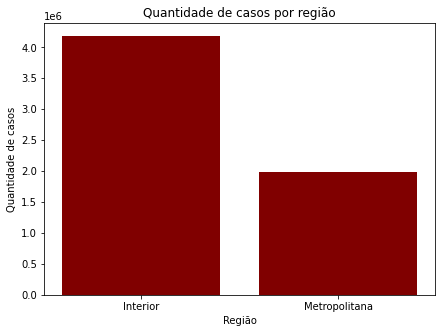

In [16]:
plt.figure(figsize=(7,5))
plt.bar('Interior', casosInterior, color = 'maroon')
plt.bar('Metropolitana', casosRGM, color = 'maroon')
plt.xlabel("Região")
plt.ylabel("Quantidade de casos")
plt.title("Quantidade de casos por região")
plt.savefig("graf1.png") 
plt.show()

In [17]:
df_cidadesRGM

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
44,3503901.0,RMSP (exceto capital),Arujá,12381,361
64,3505708.0,RMSP (exceto capital),Barueri,46723,1259
74,3506607.0,RMSP (exceto capital),Biritiba Mirim,1588,120
101,3509007.0,RMSP (exceto capital),Caieiras,12962,357
103,3509205.0,RMSP (exceto capital),Cajamar,5655,267
121,3510609.0,RMSP (exceto capital),Carapicuíba,39057,1276
144,3513009.0,RMSP (exceto capital),Cotia,26740,797
152,3513801.0,RMSP (exceto capital),Diadema,31182,1544
167,3515004.0,RMSP (exceto capital),Embu das Artes,11161,731
168,3515103.0,RMSP (exceto capital),Embu-Guaçu,5901,236


In [18]:
df_cidadesInterior

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3500105.0,Interior,Adamantina,10625,184
1,3500204.0,Interior,Adolfo,972,28
2,3500303.0,Interior,Aguaí,6870,136
3,3500402.0,Interior,Águas da Prata,1910,38
4,3500501.0,Interior,Águas de Lindóia,5199,63
...,...,...,...,...,...
640,3557006.0,Interior,Votorantim,12545,572
641,3557105.0,Interior,Votuporanga,22769,508
642,3557154.0,Interior,Zacarias,280,12
643,3557204.0,Interior,Chavantes,2697,61


In [19]:
df_cidadesRGMT = df_cidadesRGM.sort_values(by='Mun_Total de casos', ascending=False)
df_cidadesRGMT = df_cidadesRGMT.reset_index(inplace=False)
df_cidadesRGMT = df_cidadesRGMT.drop(["index"], axis=1, inplace=False)
df_cidadesRGMT

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3550308.0,Capital,São Paulo,1127975,44040
1,3547809.0,RMSP (exceto capital),Santo André,93936,3496
2,3518800.0,RMSP (exceto capital),Guarulhos,84711,5530
3,3548708.0,RMSP (exceto capital),São Bernardo do Campo,77074,3783
4,3534401.0,RMSP (exceto capital),Osasco,48745,3106
5,3505708.0,RMSP (exceto capital),Barueri,46723,1259
6,3530607.0,RMSP (exceto capital),Mogi das Cruzes,45868,1879
7,3510609.0,RMSP (exceto capital),Carapicuíba,39057,1276
8,3529401.0,RMSP (exceto capital),Mauá,36547,1666
9,3548807.0,RMSP (exceto capital),São Caetano do Sul,33713,1145


In [20]:
df_cidadesInteriorT = df_cidadesInterior.sort_values(by='Mun_Total de casos', ascending=False)
df_cidadesInteriorT = df_cidadesInteriorT.reset_index(inplace=False)
df_cidadesInteriorT = df_cidadesInteriorT.drop(["index"], axis=1, inplace=False)
df_cidadesInteriorT

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3509502.0,Interior,Campinas,201597,5311
1,3549805.0,Interior,São José do Rio Preto,142503,3172
2,3549904.0,Interior,São José dos Campos,126653,2305
3,3552205.0,Interior,Sorocaba,105279,3197
4,3543402.0,Interior,Ribeirão Preto,104916,3429
...,...,...,...,...,...
601,3551207.0,Interior,Sarutaiá,149,22
602,3515806.0,Interior,Flora Rica,148,10
603,3514957.0,Interior,Embaúba,130,11
604,3542305.0,Interior,Redenção da Serra,122,6


In [21]:
df_cidadesInterior5 = df_cidadesInteriorT.head(5)
df_cidadesInterior5

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3509502.0,Interior,Campinas,201597,5311
1,3549805.0,Interior,São José do Rio Preto,142503,3172
2,3549904.0,Interior,São José dos Campos,126653,2305
3,3552205.0,Interior,Sorocaba,105279,3197
4,3543402.0,Interior,Ribeirão Preto,104916,3429


In [22]:
df_cidadesRGMA = df_cidadesRGMT.head(5)
df_cidadesRGMA

,Cod_IBGE,Grande região,Município,Mun_Total de casos,Mun_Total de óbitos
0,3550308.0,Capital,São Paulo,1127975,44040
1,3547809.0,RMSP (exceto capital),Santo André,93936,3496
2,3518800.0,RMSP (exceto capital),Guarulhos,84711,5530
3,3548708.0,RMSP (exceto capital),São Bernardo do Campo,77074,3783
4,3534401.0,RMSP (exceto capital),Osasco,48745,3106


In [23]:
casos_5m = df_cidadesRGMA['Mun_Total de casos'].to_numpy()
cidades_5m = df_cidadesRGMA['Município'].to_numpy()
casos_5i = df_cidadesInterior5['Mun_Total de casos'].to_numpy()
cidades_5i = df_cidadesInterior5['Município'].to_numpy()

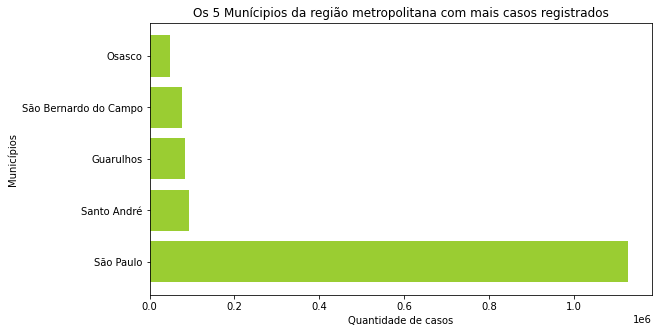

In [24]:
plt.figure(figsize=(9,5))
plt.barh(cidades_5m, casos_5m, color = 'yellowgreen')
plt.xlabel("Quantidade de casos")
plt.ylabel("Municípios")
plt.title("Os 5 Munícipios da região metropolitana com mais casos registrados")
plt.savefig('CasosRGM.png')
plt.show()

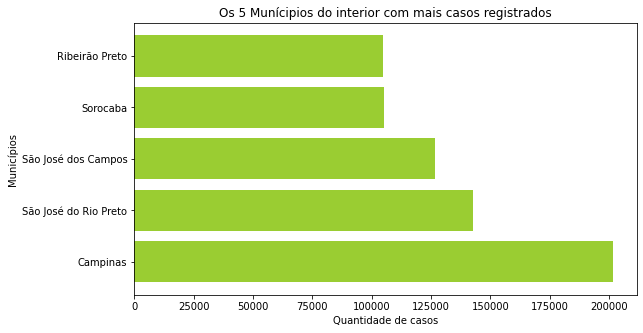

In [25]:
plt.figure(figsize=(9,5))
plt.barh(cidades_5i, casos_5i, color = 'yellowgreen')
plt.xlabel("Quantidade de casos")
plt.ylabel("Municípios")
plt.title("Os 5 Munícipios do interior com mais casos registrados")
plt.savefig('CasosInt.png')
plt.show()


Cidades do interior:
*   Campinas: ~= 1 milhão
*   São José do Rio Preto	~= 470mil
*   São José dos Campos	~= 740mil
*   Sorocaba ~= 690mil
*   Ribeirão Preto ~= 720mil

Cidades da região met.:
*   São Paulo: ~= 12 milhões
*   Santo André	~= 730mil
*   Guarulhos	~= 1.4 milhão
*   São Bernardo do Campo	 ~= 850mil
*   Osasco ~= 700mil



In [26]:
populacaoRGM = [12000000, 730000, 1400000, 850000, 700000]
populacaoInterior = [1000000, 470000, 740000, 690000, 720000]

In [27]:
relacaoPopCasosRGM = np.zeros(5)
relacaoPopCasosI = np.zeros(5)

for i in range(0,5):
  relacaoPopCasosRGM[i] = (df_cidadesRGMA['Mun_Total de casos'][i]*100)/populacaoRGM[i]
  relacaoPopCasosI[i] = (df_cidadesInterior5['Mun_Total de casos'][i]*100)/populacaoInterior[i]
  print([relacaoPopCasosRGM[i], relacaoPopCasosI[i]])

[9.399791666666667, 20.1597]
[12.867945205479453, 30.319787234042554]
[6.050785714285714, 17.11527027027027]
[9.067529411764706, 15.257826086956522]
[6.963571428571429, 14.571666666666667]


In [28]:
mun_RGM = df_cidadesRGMA['Município'].to_numpy()
mun_I = df_cidadesInterior5['Município'].to_numpy()

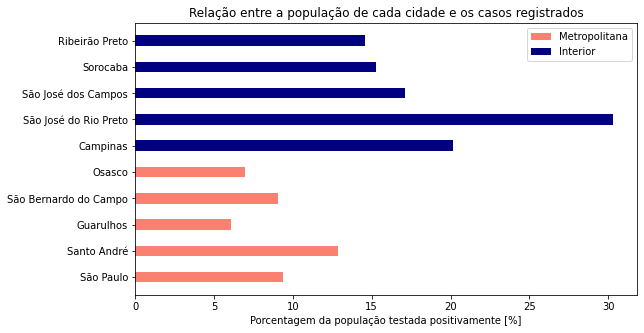

In [29]:
barwidth = 0.4
plt.figure(figsize=(9,5))

plt.barh(mun_RGM, relacaoPopCasosRGM, color = 'salmon', height = barwidth , label = 'Metropolitana')
plt.barh(mun_I, relacaoPopCasosI, color = 'navy', height = barwidth, label = 'Interior')
plt.xlabel('Porcentagem da população testada positivamente [%]')
plt.title('Relação entre a população de cada cidade e os casos registrados')
plt.legend()
plt.savefig("graf3.png") 
plt.show()

# Gerando relatório

In [ ]:
pip install fpdf2

In [31]:
from fpdf import FPDF

In [33]:
pdf = FPDF('P', 'mm', 'A4') #orientação P - Retrato / L - Paisagem -- Unidade de medida -- Formato da folha

pdf.add_page()
pdf.set_font('Times', '', 16)

pdf.cell(195, 10, align='C', txt = 'Desafio final do módulo III', ln = True)
pdf.ln(5)

pdf.set_font('Times', '', 12)

texto =  'O projeto em questão tem como objetivo realizar uma análise dos dados fornecidos pelo Governo de São Paulo na página (seade.gov.br/coronavirus), a partir desses dados será comprovado um problema gerado pela pandemia do Covid-19.'
texto2 = 'Após realizar a organização do dataframe utilizado, pensou-se na seguinte questão: A quantidade de casos registrados nas cidades consideradas região metropolitana de SP é semelhante a quantidade registrada nos interiores de SP?'
texto3 = 'Com o questionamento feito, realizou-se as devidas manipulações no dataframe para obter a resposta desejada. Nesse sentido, o gráfico apresentado logo abaixo apresenta a primeira resposta para o questionamento.'
texto4 = 'Ao observar a figura acima, nota-se que a quantidade de casos nas cidades do interior de SP representam quase o dobro de casos registrados nas metrópoles, portanto, tal resposta comprova que a quantidade de casos não são semelhantes'
texto5 = 'A partir dessa resposta, realizou-se uma consulta no google em relação a quantidade de habitantes do Estado de São Paulo, que chega a aproximadamente 45 milhões de pessoas, sendo aproximadamente 22 milhões residentes das cidades metrópolitanas.'
texto6 = 'Partindo de tal afirmativa, surgiu uma nova indagação: Qual é a porcentagem de casos registrados em relação a população das 5 cidades da região metropolitana e do interior com maiores indices de casos? A resposta desse questionamento carrega uma conclusão de conhecimento público, a qual será exposta no decorrer da explicação.'
texto7 = 'Para responder o questionamento anterior, obteve-se os seguintes gráficos:'
texto8 = 'Nota-se que no segundo gráfico a escala está em milhão, por exemplo, a cidade de São Paulo registrou mais de 1 milhão de casos. Para obter as porcentagens dos casos em relação a população de cada cidade foi necessário consultar o google novamente para conhecer a quantidade de habitantes em cada cidade, obtendo:'
texto9 = 'Conhecendo tais valores, construi-se o seguinte gráfico:'
texto10 = 'Observando esse gráfico, nota-se que tal porcentagem é maior para as cidades do interior, como por exemplo na cidade de Campinas, a qual possui cerca de 20% da população contraiu o vírus. Por fim, conclui-se que há uma diferença entre as medidas tomadas nas cidades da metrópole em relação as cidades do interior, mesmo na capital de SP, a qual possui uma população extremamente grande, não existiu uma alta porcentagem de casos registrados'
texto11 = 'Portanto, o problema principal observado é a questão do excesso de atenção para as cidades metropolitanas e o "esquecimento" das demais cidades do Estado.'


pdf.multi_cell(0, 7, align='J', txt = texto)
pdf.ln(2)

pdf.multi_cell(0, 7, align='J', txt = texto2)
pdf.ln(2)

pdf.multi_cell(0, 7, align='J', txt = texto3)
pdf.ln(100)

pdf.image(name='graf1.png',x=45,y=90,w=120)

pdf.multi_cell(0, 7, align='J', txt = texto4)
pdf.ln(2)

pdf.multi_cell(0, 7, align='J', txt = texto5)
pdf.ln(2)

pdf.multi_cell(0, 7, align='J', txt = texto6)
pdf.ln(2)

pdf.multi_cell(0, 7, align='J', txt = texto7)

pdf.add_page()

#IMG
pdf.image(name='CasosInt.png',x=30,y=15,w=150)
pdf.image(name='CasosRGM.png',x=30,y=95,w=150)

pdf.ln(180)
pdf.multi_cell(0, 7, align='J', txt = texto8)

pdf.image(name='populacao_cidadesSP.png',x=75,y=215,w=70)

pdf.add_page()

pdf.ln(10)

pdf.multi_cell(0, 7, align='J', txt = texto9)
pdf.ln(2)

pdf.image(name='graf3.png',x=35,y=30,w=150)

pdf.ln(85)
pdf.multi_cell(0, 7, align='J', txt = texto10)

pdf.ln(2)
pdf.multi_cell(0, 7, align='J', txt = texto11)

pdf.output('relatório.pdf')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The parameter "ln" is deprecated. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  import sys
